In [10]:
# importing required libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("Titanic Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# df.info()
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df.duplicated().sum()

0

[Text(0.5, 1.0, 'Fare outliers')]

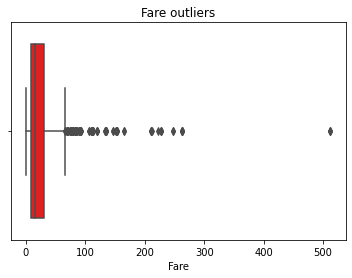

In [17]:
# detecting the outliers

# using red color, set title
sns.boxplot(x='Fare', data=df, color='red').set(title='Fare outliers') 


In [18]:
#Some people wierdly bought the ticket with more than 500
#Finding out more information about these people
df[df['Fare']==df['Fare'].max()]
#Conclusions : These people where all in first class , all embarked from C = Cherbourg and they all survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


male      577
female    314
Name: Sex, dtype: int64


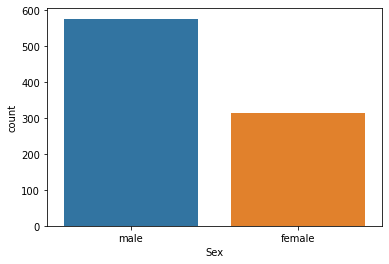

In [39]:

sns.countplot(data = df,x='Sex')

print(df.Sex.value_counts())
#Conclusions : most of the aboard where males

0    549
1    342
Name: Survived, dtype: int64


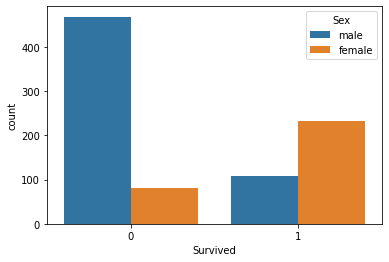

In [41]:
sns.countplot(data = df , x='Survived',hue='Sex')
print(df.Survived.value_counts())
#Conclusion : most of the survivors where females

3    491
1    216
2    184
Name: Pclass, dtype: int64


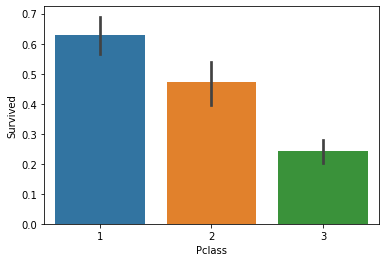

In [44]:
sns.barplot(data = df, y='Survived',x='Pclass')
print(df.Pclass.value_counts())
#Conclusion : most of the people that survived where from the 1st class

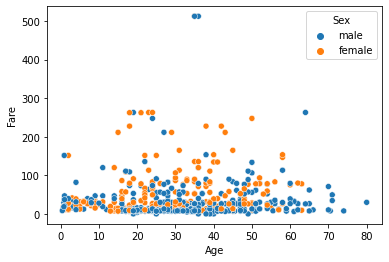

In [21]:
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")

S    644
C    168
Q     77
Name: Embarked, dtype: int64


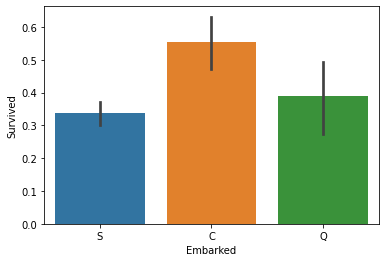

In [22]:
sns.barplot(data = df, y='Survived',x='Embarked')
print(df.Embarked.value_counts())
#Conclusions : most people to survive where embarked from C = Cherbourg, while the least to survive where embarked from S = Southampton

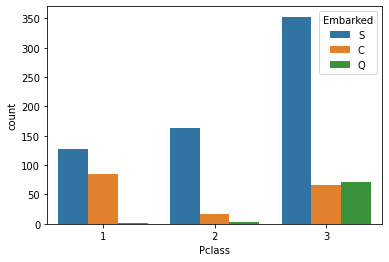

In [51]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Embarked')
# Conclusion : Most of the people embarked from C = Cherbourg where first class
#              And Most of the people embarked from  Q = Queenstown where third class

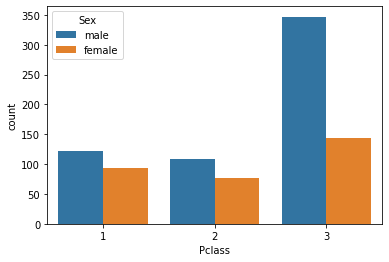

In [23]:
sns.countplot(  x='Pclass',hue='Sex', data=df)
#Conclusions : The 3rd class included the most passengers(and they where mostly males)

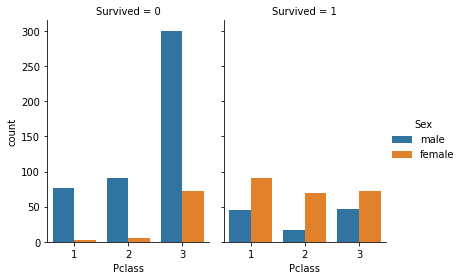

In [24]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

[Text(0.5, 1.0, 'Number of parents/children')]

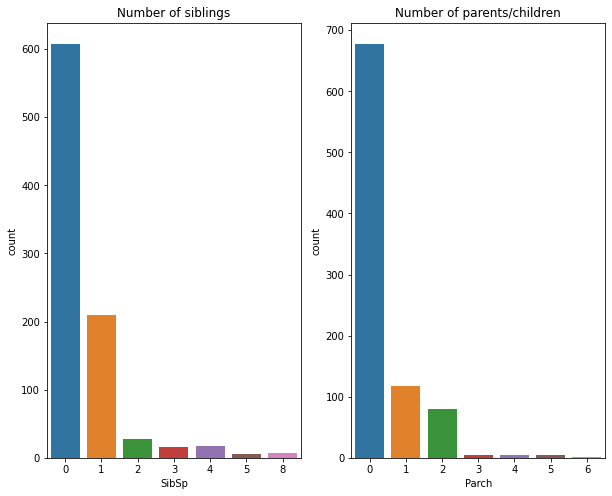

In [48]:
fig,axes=plt.subplots(1,2,figsize=(10,8))

sns.countplot(data = df , x = 'SibSp' , ax = axes[0]).set(title='Number of siblings')
sns.countplot(data = df , x = 'Parch' , ax = axes[1]).set(title='Number of parents/children')

#Conclusion : most of the people aboard where alone without siblings,parents or children

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


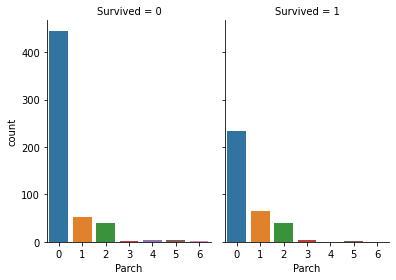

In [50]:
sns.catplot(x="Parch", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);
print(df.Parch.value_counts())